# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,0
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,0
40,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795,0
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750,1
142,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,2
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415,1
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,0
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675,2
13,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150,0
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,0


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [3]:
data.isnull().sum()


Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

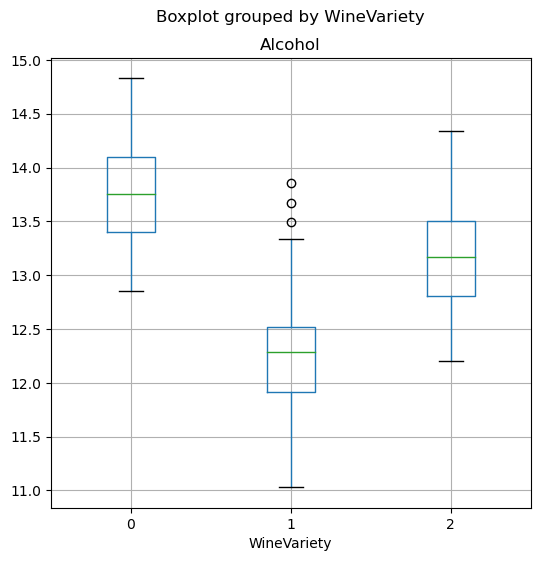

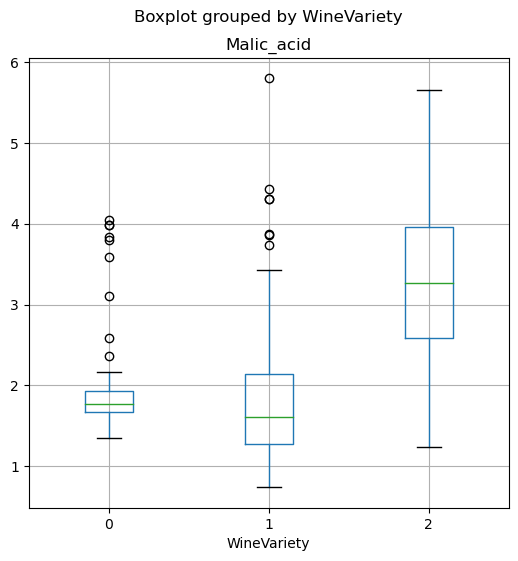

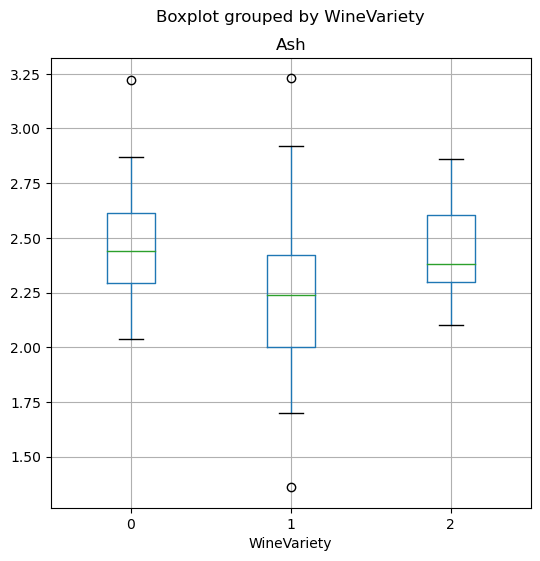

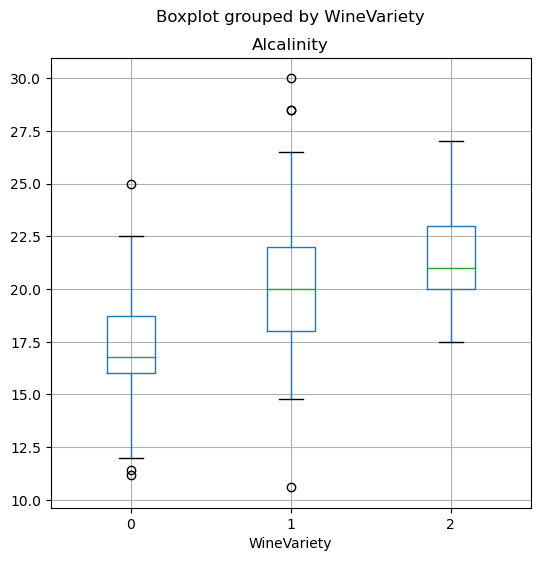

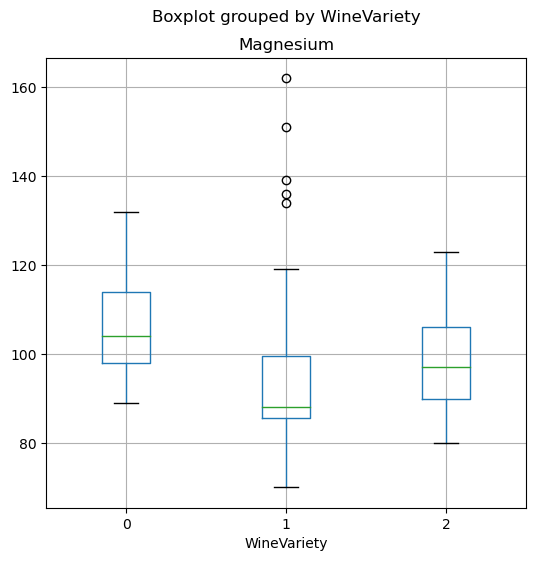

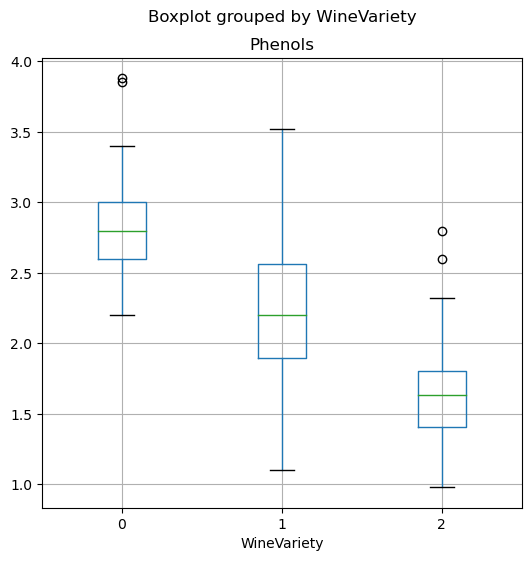

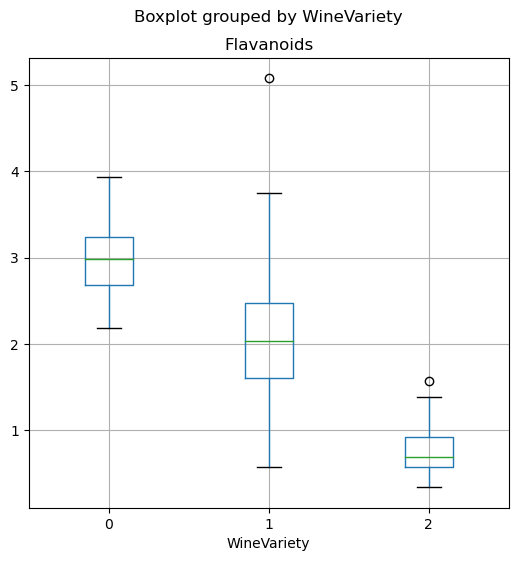

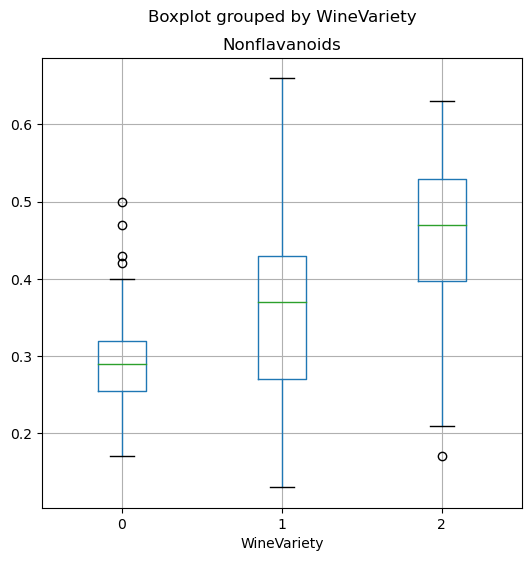

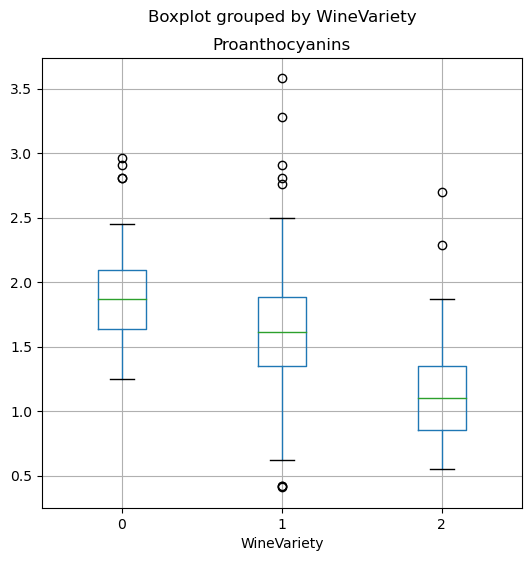

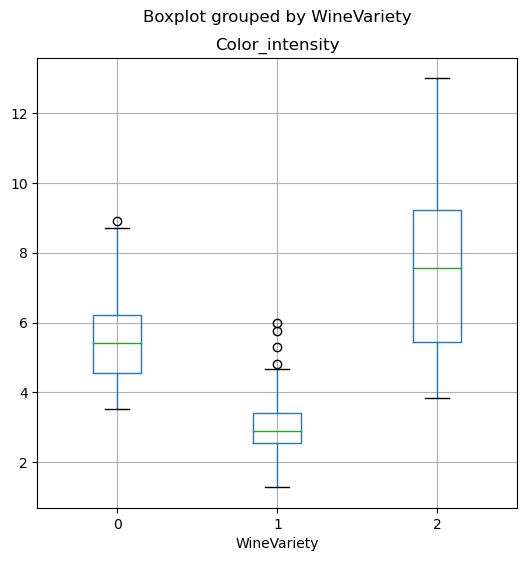

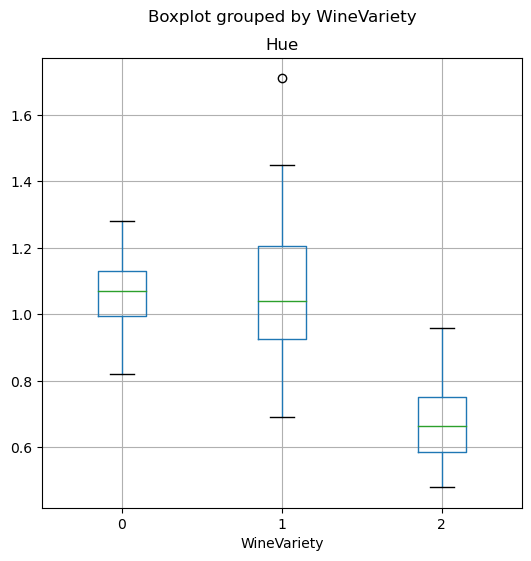

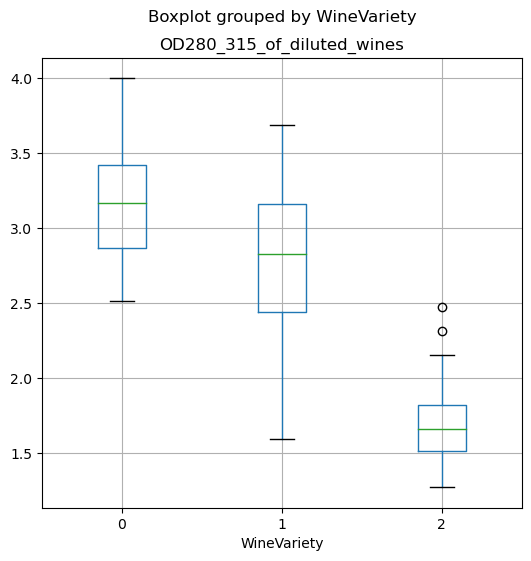

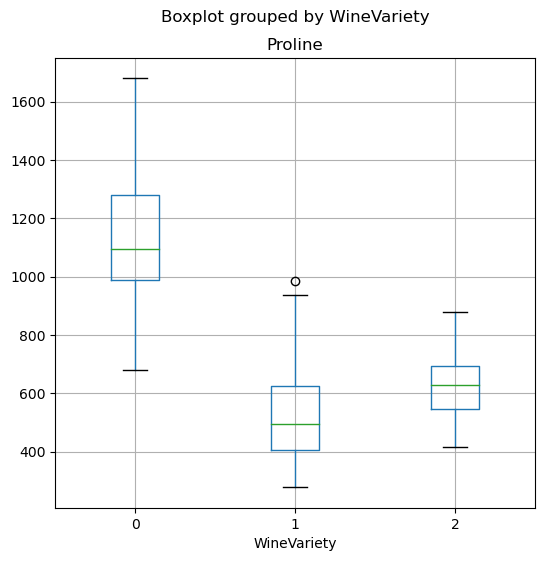

In [12]:
import matplotlib.pyplot as plt

wine_columns = data.columns[:-1]
label = data.columns[-1]

for col in wine_columns:
    data.boxplot( column=col, by=label, figsize=(6,6) )
    plt.title(col)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

wines_X, wines_y = data[wine_columns].values, data[label].values

x_wine_train, x_wine_test, y_wine_train, y_wine_test = train_test_split( wines_X , wines_y,
                                                                            test_size=0.30,
                                                                            random_state=0,
                                                                            stratify=wines_y ) 

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (scale them)
feature_columns = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_wine_train, y_wine_train)
print (multi_model)                                                     

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('preprocess',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])],
                                   

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Average AUC: 1.0


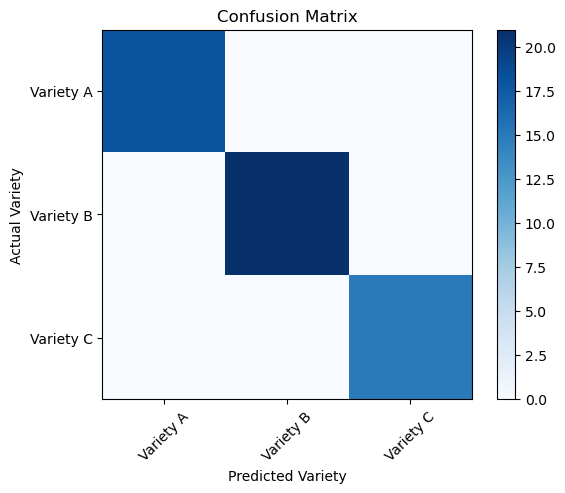

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np

# Get predictions from test data
wine_predictions = multi_model.predict(x_wine_test)
wine_prob = multi_model.predict_proba(x_wine_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_wine_test, wine_predictions))
print("Overall Precision:",precision_score(y_wine_test, wine_predictions, average='macro'))
print("Overall Recall:",recall_score(y_wine_test, wine_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_wine_test,wine_prob, multi_class='ovr'))

# Plot confusion matrix
cm = confusion_matrix(y_wine_test, wine_predictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

print("Overall Accuracy:",accuracy_score(y_wine_test, wine_predictions))
print("Overall Precision:",precision_score(y_wine_test, wine_predictions, average='macro'))
print("Overall Recall:",recall_score(y_wine_test, wine_predictions, average='macro'))

In [28]:
import joblib

filename = "./wine_model.pkl"
joblib.dump( multi_model, filename )

['./wine_model.pkl']

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [29]:
model = joblib.load( filename )

x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

predictions = model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + classes[prediction] +')')

0 (Variety A)
1 (Variety B)
